# Intro a la Recursion

## Diseño de una operación recursiva

Estructura de operación general para resolver un problema recursivo:

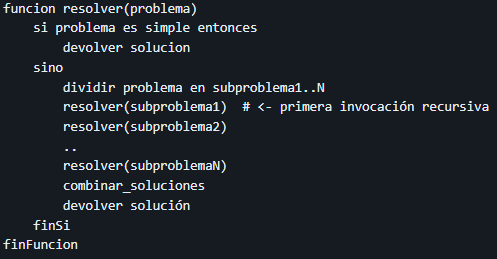

Ejemplo:

In [ ]:
def sumatoria(n: int) -> int:
    if n < 1:
        raise ValueError(f'Se recibe {n}, n debe ser mayor a 0')
    elif n == 1:
        return 1
    else:
        return sumatoria(n-1) + n


## Tipos de recursion

### Clasificación según referencia

#### Recursión simple

Existe una única llamada recursva en una función o precedimiento, o bien, una estructura de datos se compone con un elemento del mismo tipo de datos que se está definiendo. También denominada **recursión lineal**.

In [2]:
def factorial(n: int) -> int:
    if n <= 1:
        return 1
    else:
        return factorial(n-1) * n

#### Recursión múltiple

Podemos identificar casos particulaes como recursión doble o recursión triple si son dos o tres referencias recursivas respectivamente

In [3]:
def fibonacci(n: int) -> int:
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

En general la recursión múltiple es muy ineficiente ya que se genera un árbol de invocaciones, a diferencia de la recursión simple que es una secuencia de invocaciones. En casos donde se invoquen varias veces una misma instancia recursiva y se respete la transparencia referencial, es posible utilizar la técnica de memoization que almacena el resultado en memoria para evitar recomputarlo en próximas invocaciones.

![Arbol de fib()](image.png)


Cuando invocamos ``fibonacci(4)`` se producen diversas invocaciones recursivas, generando así un árbol de invocaciones donde existen evaluaciones repetidas. Por ejemplo, ``fibonacci(2)`` se evalúa 2 veces en ese caso, si utilizamos _memoization_ sólo lo evaluaríamos una vez y reduciría notablemente la cantidad de invocaciones (se poda el árbol)

In [5]:
def fibonacci_memoization(n: int) -> int:
    calculados = {} # memoization

    def fibo_interna(n: int) -> int:
        if n < 0:
            raise ValueError('n debe ser mayor o igual a 0')
        if n <= 1:
            return n
        if n not in calculados:
            calculados[n] = fibo_interna(n-1) + fibo_interna(n-2)
        return calculados[n]
  
    return fibo_interna(n)

Debido a que Python **instancia los objetos de los parámetros por default** al momento de la definición de la operación, podríamos apoyarnos en este comportamiento del lenguaje para evitar la función interna ``fib_interna``.

In [ ]:
def fibonacci(n: int, calculados: dict = {}) -> int:
    if n < 0:
        raise ValueError('n debe ser mayor o igual a 0')
    if n <= 1:
        return n
    if n not in calculados:
        calculados[n] = fibonacci(n-1) + fibonacci(n-2)
    return calculados[n]

### Clasificación según dirección

Esta distinción se basa en determinar si la recursión ocurre o no en la misma operación. Esto también se aplica para el caso de estructuras recursivas.

#### Recursión directa
Cuando diseñamos una operación recursiva que realiza su invocación a sí misma dentro de su propio cuerpo, estamos hablando de una **recursión directa**.

#### Recursión indirecta
Por el contrario, puede suceder que una operación vuelva a ser invocada a así misma a partir de invocaciones intermediarias a otras operaciones dentro de la instancia recursiva. En ese caso, hablamos de **recursión indirecta**.  

``operacion1 -> operacion2 -> operacion3 -> operacion1``

Un caso especial de recursión indirecta es donde intervienen sólo dos componentes y se la denomina **recursión mutua**.

In [6]:
def es_par(n: int) -> bool:
  return n == 0 or es_impar(n - 1)

def es_impar(n: int) -> bool:
  return False if n == 0 else es_par(n - 1)

print(es_par(10))   # True
print(es_par(9))    # False
print(es_impar(4))  # False
print(es_impar(7))  # True

True
False
False
True


En este caso vemos cómo distinguir la paridad de un número entero no negativo. Si ingresáramos un número negativo se generaría la excepción ``RecursionError`` ya que se produce una recursión infinita. Ambas funciones llaman a la otra, generando así una **recursión indirecta**.

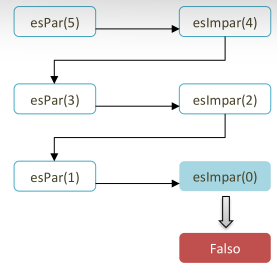

### Clasificación según visibilidad

#### Recursión explícita

Hasta el momento modelamos funciones recursivas que se llaman directamente y en su bloque se puede ver claramente la invocación recursiva (recursión directa), o bien se puede seguir el código para encontrar que la recursión es indirecta. De una forma u otra, la ejecución siempre se realiza sobre una función o procedimiento recursivo. A este tipo de invocación la llamaremos **recursión explícita**, ya que se tiene visibilidad que se está ejecutando un bloque recursivo.

#### Recursión implícita
En algunos casos tendremos la necesidad de definir ciertas precondiciones para ejecutar luego un procedimiento recursivo. La invocación inicial se realiza mediante un procedimiento o función que no presenta recursión, el cual invoca a otro procedimiento o función que sí presenta recursión. Entonces, si analizamos el tipo de recursión desde el procedimiento o función inicial, se puede decir que presenta una **recursión implícita**.

# Formas de Recursión

## Recursión de Pila

Recordemos la estructura de una operación recursiva:

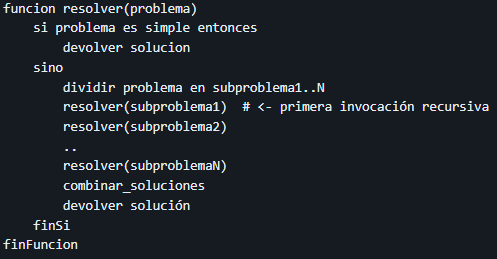

Al momento de ejecutarse se realiza la primera invocación recursiva, toda información referida a la actual instancia de ejecución de la operación ``resolver`` será almacenada en la **pila de ejecución** y luego se apilará una nueva instancia en la misma pila la cual corresponderá a la ejecución recursiva recién lanzada. Por lo tanto, al llegar a esa sentencia, el programa comienza a ejecutar una nueva instancia recursiva y **suspende el resto de la ejecución de la instancia actual**, la cual será completada luego de que finalice la invocación recursiva.  

Este tipo de recursión provee la ventaja de permitir soluciones recursivas en general más elegantes y es la forma más natural de soluciones recursivas, sobre todo en el paradigma funcional. Una desventaja no menor es que puede provocar la **saturación de la pila** cuando la recursión es muy profunda, ya que la pila de ejecución es finita.

A este diseño de recursión lo llamaremos **recursión de pila**, ya que para resolver el problema recursivo **nos apoyamos en la pila de ejecución**.  

La recursión de pila sucede cuando en el caso recursivo nos **quedan operaciones pendientes por hacer luego de la invocación recursiva**.

### Ejemplo con factorial

In [7]:
def factorial(n: int) -> int:
    if n <= 1:
        return 1
    else:
        resultado_parcial = factorial(n-1)
        return resultado_parcial * n

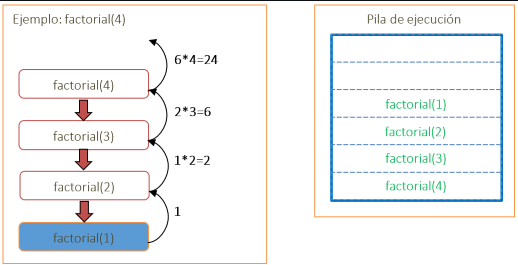

Cuando se llega al caso base no existen otras invocaciones recursivas sino que comienza la **_vuelta hacia atrás_** de la recursión, donde cada operación termina de computar las sentencias pendientes y devolver el resultado correspondiente. Esto se visualiza con las flechas negras que **representan el retorno de cada instancia de ``factorial()``**.

Es común asociar la idea de construir la solución recursiva de _atrás hacia el principio_ cuando trabajamos con recursión de pila.

## Recursión de cola (tail)

Cuando estemos ante una **recursión simple**, es posible encontrar una forma de resolución que **no requiera apoyarse en la pila de ejecución**. Esta forma particular debe evitar realizar operaciones posteriores con el resultado parcial de la invocación recursiva. En este caso no existiría la idea de la _vuelta atrás_ para construir el resultado final, sino que **se construye a medida que se entra en la recursión y se devuelve el valor final al llegar al caso base**.

La recursión de cola **no necesita apoyarse en la pila de ejecución** para resolver un problema, porque la solución se computa parcialmente en cada invocación desde el principio y se retorna al llegar al caso base.

### Ejemplo con factorial

In [8]:
def factorial(n: int) -> int:
    def factorial_interna(n: int, acumulador: int) -> int:
        if n <= 1:
            return acumulador
        else:
            resultado_parcial = acumulador * n
            return factorial_interna(n-1, resultado_parcial)
    return factorial_interna(n, 1)

El uso de una función interna es de gran utilidad en esta situación porque la función externa la invoca con cierta inicialización que es oculta a quien la consume, como el caso de inicializar el acumulador en 1.

Queda bien resaltado que la última operación del caso recursivo es justamente la invocación recursiva ``factorial_interna(n-1, resultado_parcial)``, **no queda nada pendiente por computar** sino sólo devolver el resultado. Cada invocación sucesiva a instancias de problemas más pequeños (n - 1) computa **un resultado parcial que se acerca cada vez más a la solución final**.

En la recursión de cola la **última sentencia** del caso recursivo **es la invocación recursiva**.

### Recursión de cola -> Iteración

Probablemente lo más ventajoso de definir una operación con **recursión de cola** es que podemos escribirla como una simple **iteración**, y así nunca utilizaremos la pila de ejecución para sucesivas invocaciones recursivas.

Diseño genérico para la recursión de cola:

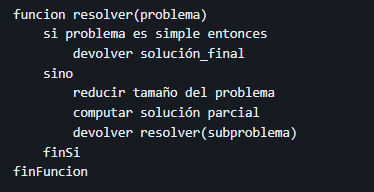

A partir de esta generalización podríamos proponer como se transformaría en una solución iterativa:  

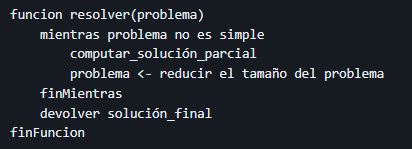

La transformación, en términos genéricos, de una recursión de cola en una iteración se logra realizando lo siguiente:

+ Se cambia el ``if`` por un bucle ``while``
+ La condición del ``if`` (caso base) negada pasa a ser la condición del ``while``
+ El caso recursivo pasa a ser el cuerpo del while
+ El retorno del caso base es el retorno final de la solución iterativa

La recursión de cola **siempre puede reemplazarse por una iteración**, por eso se la conoce también como **falsa recursión**.

Versión iterativa del factorial:

In [9]:
def factorial(n: int) -> int:
    solucion = 1
    while n > 1:
        solucion *= n
        n -= 1
    return solucion

Si contemplamos las indicaciones previas, estamos negando el caso base ``n <= 1`` que pasa a ser ``n > 1`` como condición del ``while``, y resumimos el cómputo del caso recursivo como ``solucion *= n`` y luego el decremento del problema ``n -= 1``.

## Eliminar la recursión

Cuando hablamos de *eliminar la recursión* nos referimos a **evitar la recursión de pila, convirtiendo la solución a una recursión de cola** o una iteración.

### Acumulando la solución parcial

Esta estrategia sigue el concepto mencionado de la **recursión de cola** que plantea una **construcción de la solución desde la primera invocación**. Esto difiere de la forma natural recursiva para construir soluciones, como lo es cuando utilizamos recursión de pila, donde la construcción de la solución comienza desde el caso base. 

Veamos cómo se calcula realmente el factorial con ambas formas de recursión vistas.

+ **Cálculo del resultado con recursión de pila**
  
  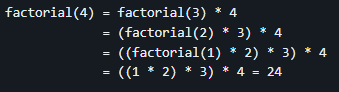

+ **Cálculo del resultado con recursión de cola**
  
  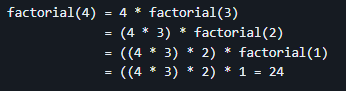

El resultado final es el mismo porque el producto es una operación **asociativa y conmutativa**. Entonces siempre debemos contemplar el orden y cómo se combinan las soluciones cuando utilizamos la **estrategia del acumulador**.

No siempre podremos eliminar la recursión con la estrategia de acumulación, debemos prestar atención en cómo se construyen las soluciones.

Veamos un ejemplo donde no podemos utilizar esta estrategia:

In [10]:
def resta_lista(xs: list[int]) -> int:
    if xs == []:
        return 0
    else:
        return xs[0] - resta_lista(xs[1:])

resta_lista([10, 2, 5, 9])   # (10 - (2 - (5 - 9))

4

In [11]:
def resta_lista(xs: list[int]) -> int:
    def resta_lista_interna(xs: list[int], acumulador: int) -> int:
        if xs == []:
            return acumulador
        else:
            return resta_lista_interna(xs[1:], acumulador - xs[0])
    return 0 if xs == [] else resta_lista_interna(xs[1:], xs[0])

resta_lista([10, 2, 5, 9]) # (((10 - 2) - 5) - 9)

-6

Esta versión que utiliza recursión de cola intenta replicar la misma operación de restar elementos de la lista, pero produce un resultado diferente ``(((10 - 2) - 5) - 9) = -6``. El problema de esta conversión inválida es que no podemos computar previamente la resta de los elementos finales como el caso de la anterior. Por lo tanto no podemos convertir la función original con esta estrategia.

### Utilizando pila explícita

Cuando no podemos eliminar la recursión de pila utilizando un acumulador podemos optar por esta estrategia. La idea es simple, **gestionaremos nuestra propia pila de ejecución** en un objeto de tipo ``Pila`` o ``Stack``. Entonces simularemos manualmente el apilado y desapilado de invocaciones recursivas con la información necesaria para construir la solución en el mismo orden y con la misma asociación de soluciones parciales. Así podremos eliminar la recursión de pila para convertir la solución en una recursión de cola o en una simple iteración.

In [12]:
def resta_lista(xs: list[int]) -> int:
    def apilado(xs: list[int], pila: list[int]):
        if xs != []:
            pila.append(xs[0])
            apilado(xs[1:], pila)

    def desapilado(pila: list[int], acumulador: int) -> int:
        if pila == []:
            return acumulador
        else:
            return desapilado(pila, pila.pop() - acumulador)
      
    pila = []
    apilado(xs, pila)
    return desapilado(pila, 0)

resta_lista([10, 2, 5, 9]) # (10 - (2 - (5 - 9))

4

Si bien cada caso será diferente, en general este tipo de conversión se realiza con **dos pasos, uno donde se apilan las instancias de problemas reducidos** (similar a como se hace naturalmente con la pila de ejecución) **y otro que representa la vuelta atrás de la recursión**. El primer paso se manifiesta con la función ``apilado()`` que recibe una lista vacía y la carga con cada elemento de la lista. El segundo paso se logra con ``desapilado()`` donde se recibe una lista cargada y se comienza a desapilar y realizando los cálculos pendientes que se harían en la vuelta atrás de la recursión de pila. Notemos que ambas funciones internas son ahora una recursión de cola, por lo cual logramos eliminar la recursión de pila.

# Backtracking

En el ámbito de la ciencia de la computación existen una amplia variedad de problemas donde es necesario **explorar exhaustivamente un conjunto finito de posibles soluciones** para encontrar aquellas que cumplan con ciertas condiciones o restricciones.

## Característivas de los problemas

Los problemas mencionados comparten las siguientes características:

+ **Espacio de soluciones finito**: Los problemas tienen un espacio de soluciones finito y bien definido
  
+ **Restricciones o condiciones explícitas**: Los problemas deben tener restricciones claras y bien definidas que las soluciones deben cumplir. Estas restricciones pueden estar relacionadas con la validez de la solución, limitaciones de tiempo o recursos, o cualquier otro criterio específico del problema.
  
+ **Solución satisfactoria**: En algunos casos, se busca encontrar la **solución óptima** que satisfaga ciertos criterios predefinidos. En otros casos, el objetivo puede ser simplemente encontrar cualquier **solución válida**.

### El concecpto de backtracking

Es una **técnica de resolución de problemas** que se basa en la **exploración sistemática de todas las posibles soluciones** para encontrar aquellas que cumplen con ciertas restricciones o condiciones. Es especialmente útil cuando se enfrentan problemas combinatorios o de búsqueda, donde se debe probar una serie de opciones para encontrar la solución óptima o satisfactoria. En general resulta práctico para algunos problemas donde la solución **no es determinística**, es decir, no existe un curso de acción que nos permita llegar siempre a la solución.

La ventaja en eficiencia de esta técnica se apoya en que puede descartar previamente soluciones parciales que sabemos que no construirán una solución óptima o válida.

Al aplicar backtracking con operaciones recursivas, en cada llamada recursiva **exploramos una rama del árbol de posibles soluciones** y, si llegamos a un punto en el que **no se satisfacen ciertas condiciones, retrocedemos** (*backtrack*) y **probamos otra opción**. Básicamente, estaremos resolviendo el problema mediante la **prueba y error**.

### El diseño con backtracking

Si bien cada problema tendrá una resolución diferente, podemos generalizar algunas pautas para tener presente durante el proceso de diseño para soluciones con esta técnica.

1) **El problema**: El primer paso al diseñar cualquier algoritmo es identificar correctamente el problema a resolver y analizar si cumple las características mencionadas.
  
2) **Solución parcial y la solución final**: Debemos definir la generación de soluciones parciales que iremos construyendo paso a paso hasta llegar a una solución válida. También es importante identificar cuándo hemos alcanzado una solución final que cumple con todas las condiciones del problema.

3) **Exploración exhaustiva**: Probamos todas las opciones posibles para construir la solución mediante llamadas recursivas que nos 
permiten explorar diferentes ramas del árbol de soluciones.

4) **Rechazo y retroceso**: Si llegamos a un punto donde no podemos seguir avanzando sin violar alguna restricción, **se descarta esa solución parcial y debemos retroceder** (*backtrack*) para probar una opción diferente. Esto implica deshacer los cambios realizados en la solución parcial y volver a un estado anterior para explorar otra rama.

LEER GIT